In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
import string
from sklearn.decomposition import PCA

In [2]:
dataset=pd.read_csv("engtamilTrain.csv")
dataset=dataset.drop(["Unnamed: 0"],axis=1)
eng_dataset=dataset["en"]
tam_dataset=dataset["ta"]

In [5]:
def preprocess(dataset):
    return[
        [word.strip(string.punctuation) for word in sentence.split() if word.strip(string.punctuation)]
         for sentence in dataset
    ]
    

In [6]:
eng_words=preprocess(eng_dataset)
tam_words=preprocess(tam_dataset)

In [12]:
def wordmodel(words,modelname):
    model=Word2Vec(words)
    model.save(modelname)
    x=model.wv.vectors
    pca=PCA(n_components=2)
    pca_result=pca.fit_transform(x)
    list_words=model.wv.index_to_key
    plt.scatter(pca_result[:,0],pca_result[:,1])
    for i,word in enumerate(list_words):
        plt.text(pca_result[i,0],pca_result[i,1],word,fontsize=9)
    plt.show()

C:\Anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128 (\x80) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 147 (\x93) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 130 (\x82) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 150 (\x96) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 159 (\x9f) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


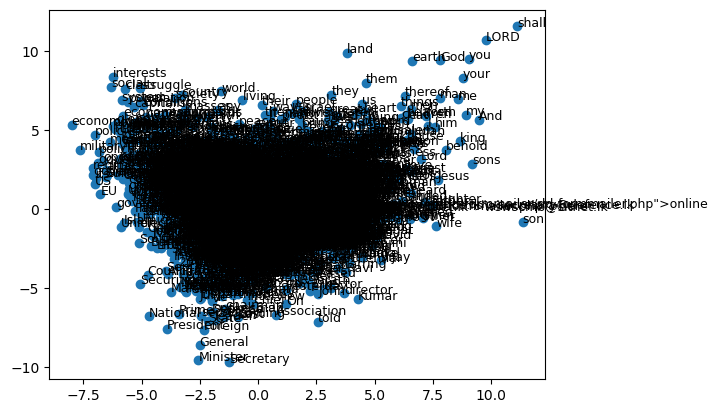

In [13]:
eng_wordvec=wordmodel(eng_words,"eng.bin")